In [1]:
import pandas as pd
df =pd.read_csv("C:/Personal/Susi/Barcelona_Activa/Project/Cleaned Dataset/ai_adopt_gdp1.csv")

In [2]:
df1=df.copy()

In [3]:
df1

,country,year,GDP,industry,ai_tool,adoption_rate,daily_active_users,user_feedback,age_group,company_size
0,Australia,2023,1.728057e+12,Education,ChatGPT,20.85,5940,MCVWNxfkdvijPwFleHKDKJTIexXAzweDWyBGDQVcOrfAsn...,25-34,Enterprise
1,Australia,2023,1.728057e+12,Technology,ChatGPT,96.13,4229,AlrUPwGubsyQ IgICwjGhyzQJQQQCyRAvqLagvoyj qVpv...,18-24,Enterprise
2,Australia,2023,1.728057e+12,Retail,Midjourney,54.92,9104,rgZEugCqGIhFTzutpApOPFJMazOblynvrUCuGck VlqldP...,25-34,Enterprise
3,Australia,2023,1.728057e+12,Transportation,ChatGPT,73.37,3168,O KnSJFaonG ercdkLgXXGrcfEwVEtjVRfueTuMKnAuYnX...,45-54,Startup
4,Australia,2023,1.728057e+12,Manufacturing,ChatGPT,15.45,424,AUHOCVMpnoeifaRCkDbpUkgETbxjbDTbDggFsHGVTBnug...,35-44,SME
...,...,...,...,...,...,...,...,...,...,...
134782,USA,2024,2.918489e+13,Retail,ChatGPT,66.28,732,NsuoHkVMQIQTyovtEPLMaYeCHgZclAYsfUBeftxq uOGEM...,18-24,SME
134783,USA,2024,2.918489e+13,Manufacturing,ChatGPT,47.34,8899,jOVNbFwntOTJOsdCfLppeAUhkEWBDeWNXhSWyybCqPuPal...,25-34,SME
134784,USA,2024,2.918489e+13,Education,ChatGPT,16.17,1941,itUcsYEzRhfkbUCVcjMvIOtcASGTGaouLCRqUfSLOvUMgn...,18-24,Startup
134785,USA,2024,2.918489e+13,Technology,Stable Diffusion,30.58,8297,nkATfOEMvPzqTMKvSkGFrPRDVnpMsLTM APzaNysPetNik...,18-24,Enterprise


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
three_blue_palette = [
  "#5DADE2",  
  "#E8A2B8",  
  "#6FBF73",  
  "#E67E22",  
  "#C9A227",  
  "#34495E",  
  "#7F8C8D",  
  "#2C3E50"   
]
sns.set_palette(three_blue_palette)
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 11,
    "axes.edgecolor": "#333333",
    "grid.alpha": 0.3
})

In [ ]:
Which AI tools are most used by daily active users?

In [8]:
tool_usage = (
    df.groupby("ai_tool", as_index=False)
      .agg(total_daily_users=("daily_active_users", "sum"))
)


In [9]:
print(tool_usage)

            ai_tool  total_daily_users
0              Bard           68109981
1           ChatGPT          271217551
2            Claude           34239933
3        Midjourney          203297681
4  Stable Diffusion          102299282


In [10]:
tool_usage = tool_usage.sort_values(
    by="total_daily_users",
    ascending=False
)


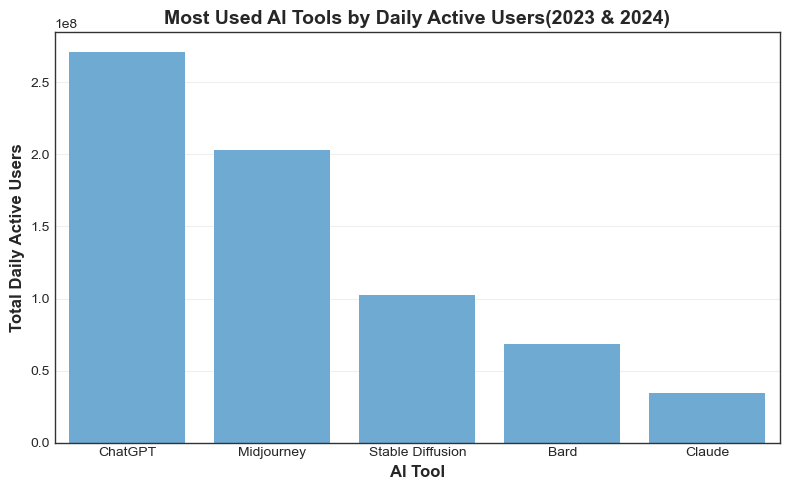

In [15]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=tool_usage,
    x="ai_tool",
    y="total_daily_users"
)

plt.title("Most Used AI Tools by Daily Active Users(2023 & 2024)")
plt.xlabel("AI Tool")
plt.ylabel("Total Daily Active Users")

plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aitool_mostused", dpi=300, bbox_inches="tight")
plt.show()


In [63]:
country_year_adoption = (
    
    df1.groupby(['ai_tool', 'year'])['adoption_rate']
      .mean()
      .reset_index()
)

In [65]:
import matplotlib.pyplot as plt


df_2324 = country_year_adoption[
    country_year_adoption['year'].isin([2023, 2024])
]


pivot_df = df_2324.pivot(
    index='ai_tool',
    columns='year',
    values='adoption_rate'
)


pivot_df = pivot_df.sort_values(by=2024, ascending=False)

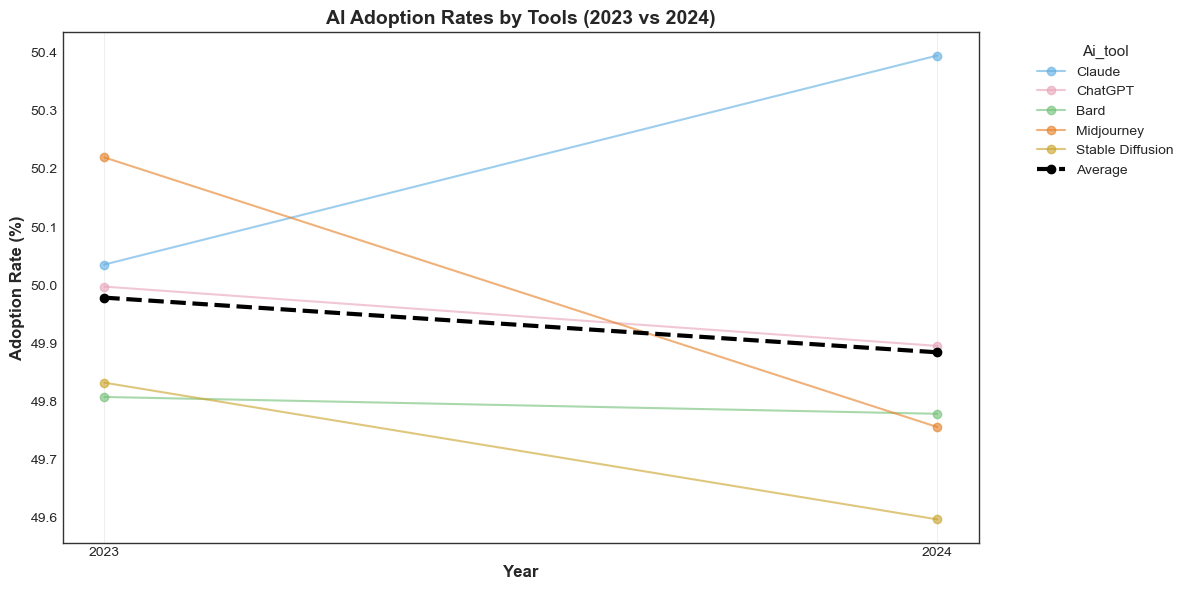

In [67]:
avg_line = pivot_df.mean()
ax = pivot_df.T.plot(
    kind='line',
    marker='o',
    figsize=(12, 6),
    alpha=0.6
)

# Average line
avg_line.plot(
    ax=ax,
    kind='line',
    marker='o',
    linewidth=3,
    linestyle='--',
    color='black',
    label='Average'
)

plt.title("AI Adoption Rates by Tools (2023 vs 2024)")
plt.ylabel("Adoption Rate (%)")
plt.xlabel("Year")

ax.set_xticks([2023, 2024])
ax.set_xticklabels(['2023', '2024'])

plt.legend(title="Ai_tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(
    r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_country",
    dpi=300,
    bbox_inches="tight"
)
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aitool_adoption_year", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
Which AI tool has the highest adoption rate in each country?

In [69]:
avg_adoption = (
    df.groupby(["country", "ai_tool"])
      .adoption_rate
      .mean()
      .reset_index()
)


In [70]:
heatmap_data = avg_adoption.pivot(
    index="country",
    columns="ai_tool",
    values="adoption_rate"
)


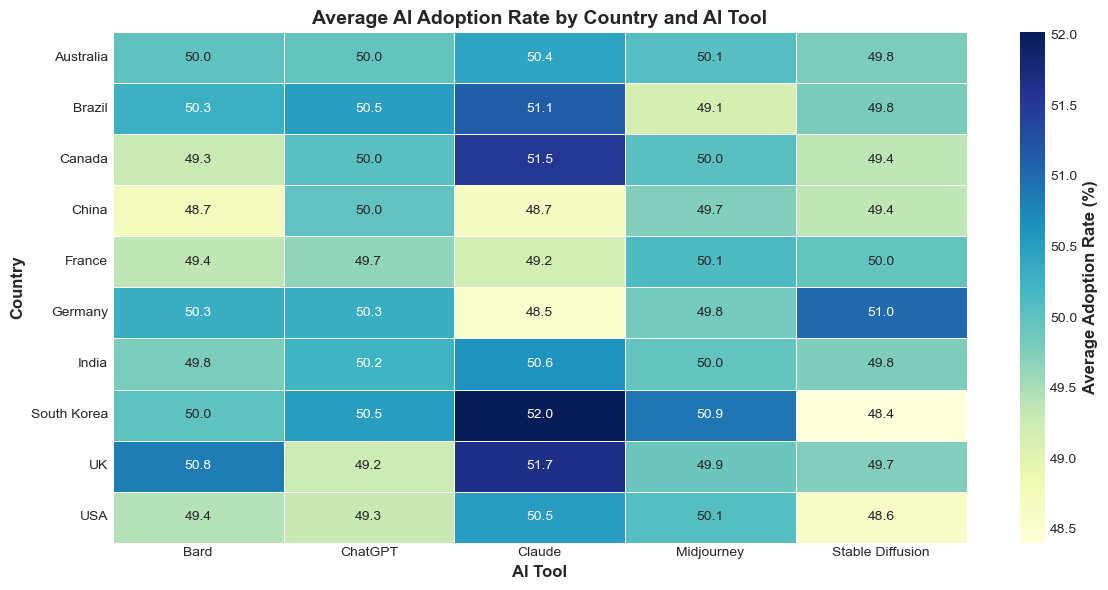

In [71]:
plt.figure()

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cmap='YlGnBu',
    cbar_kws={"label": "Average Adoption Rate (%)"}
)

plt.title("Average AI Adoption Rate by Country and AI Tool")
plt.xlabel("AI Tool")
plt.ylabel("Country")

plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_tool_country", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Which industries show the fastest growth in AI tool adoption?

In [79]:
industry_adoption = (
    df.groupby(["industry", "ai_tool"], as_index=False)
      .agg(avg_adoption_rate=("adoption_rate", "mean"))
)


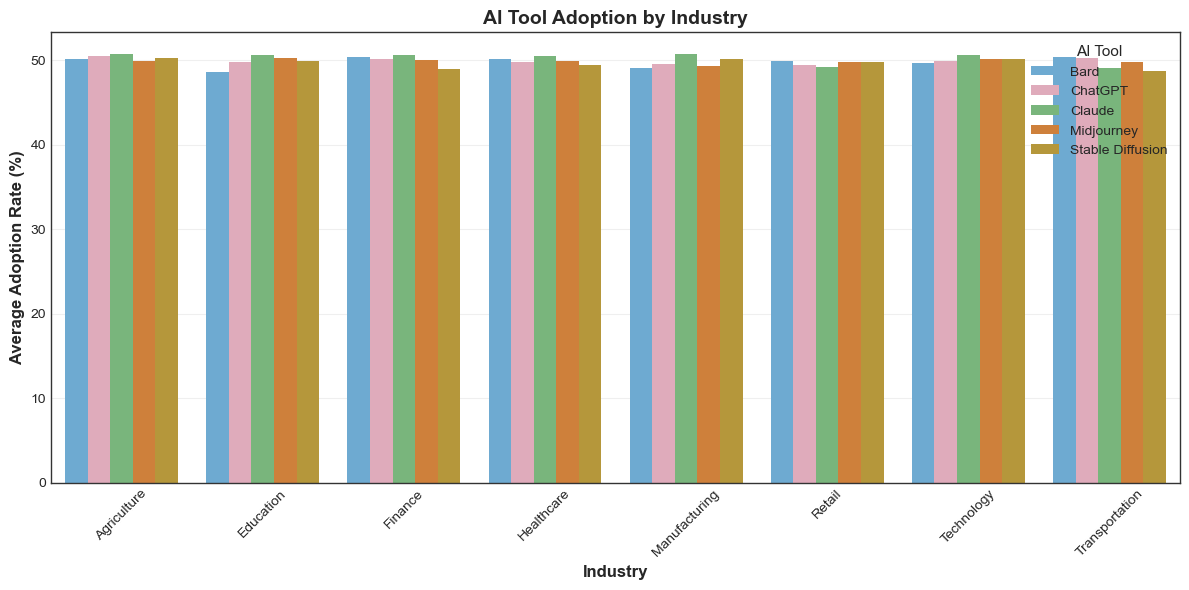

In [81]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=industry_adoption,
    x="industry",
    y="avg_adoption_rate",
    hue="ai_tool",
    errorbar=None
)

plt.title("AI Tool Adoption by Industry")
plt.xlabel("Industry")
plt.ylabel("Average Adoption Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="AI Tool")

plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoptionrate_tool_industry", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Are certain countries consistently high adopters across multiple industries?

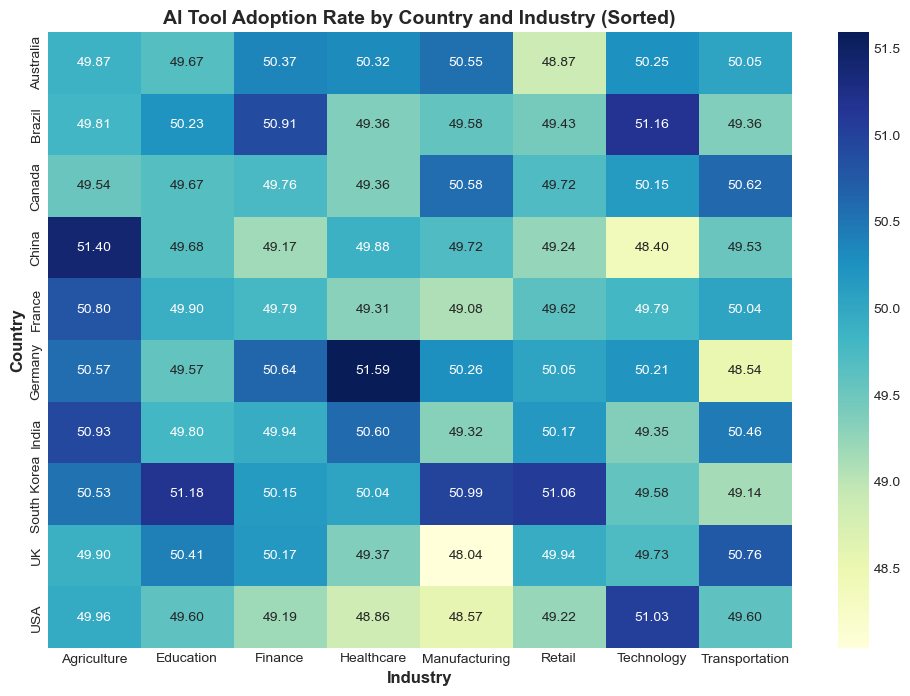

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


country_industry = df1.groupby(['country', 'industry'])['adoption_rate'].mean().unstack()


#country_industry['Average'] = country_industry.mean(axis=1)


#country_industry = country_industry.sort_values('Average', ascending=False)



plt.figure(figsize=(12,8))
sns.heatmap(country_industry, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('AI Tool Adoption Rate by Country and Industry (Sorted)')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_MultipleIndustry", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Are higher-GDP countries adopting AI faster across industries?

<Figure size 700x500 with 0 Axes>

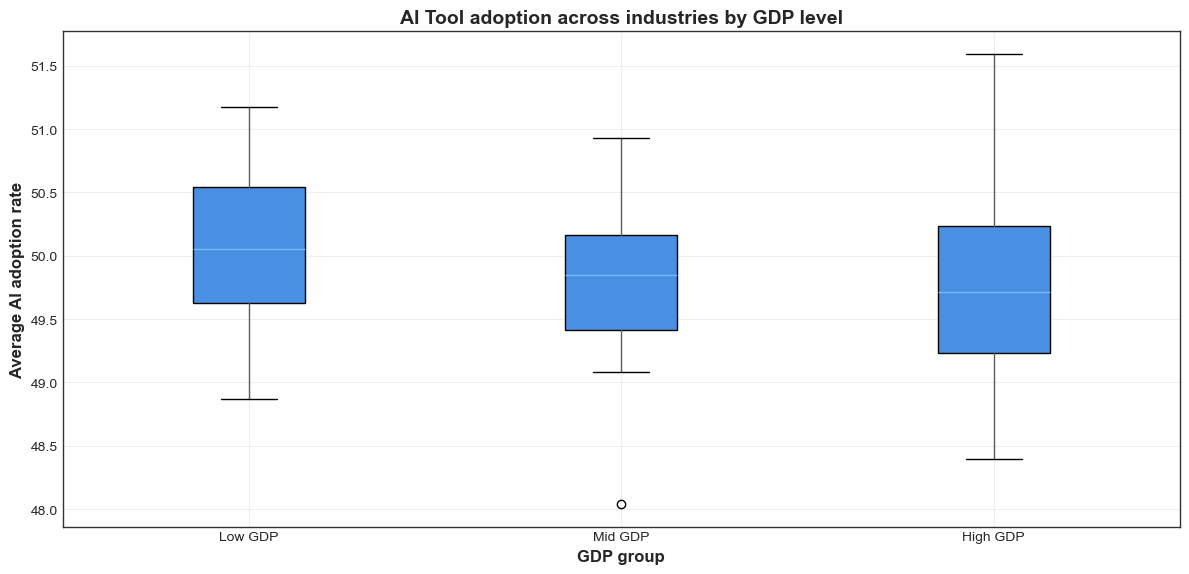

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df1 = df1[["country", "industry", "GDP", "adoption_rate"]]

data = (
    df.groupby(["country", "industry"])
      .agg(GDP=("GDP", "mean"),
           avg_adoption_rate=("adoption_rate", "mean"))
      .reset_index()
)


data["GDP_group"] = pd.qcut(data["GDP"], q=3, labels=["Low GDP", "Mid GDP", "High GDP"])


plt.figure(figsize=(7,5))
data.boxplot(column="avg_adoption_rate", by="GDP_group",patch_artist=True,
    boxprops=dict(facecolor="#4a90e2"),
    medianprops=dict(color="#74b9ff"))
plt.xlabel("GDP group")
plt.ylabel("Average AI adoption rate")
plt.title("AI Tool adoption across industries by GDP level")
plt.suptitle("")
plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_industry_GDP", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
6.	Does GDP influence adoption differently for small vs. large companies?

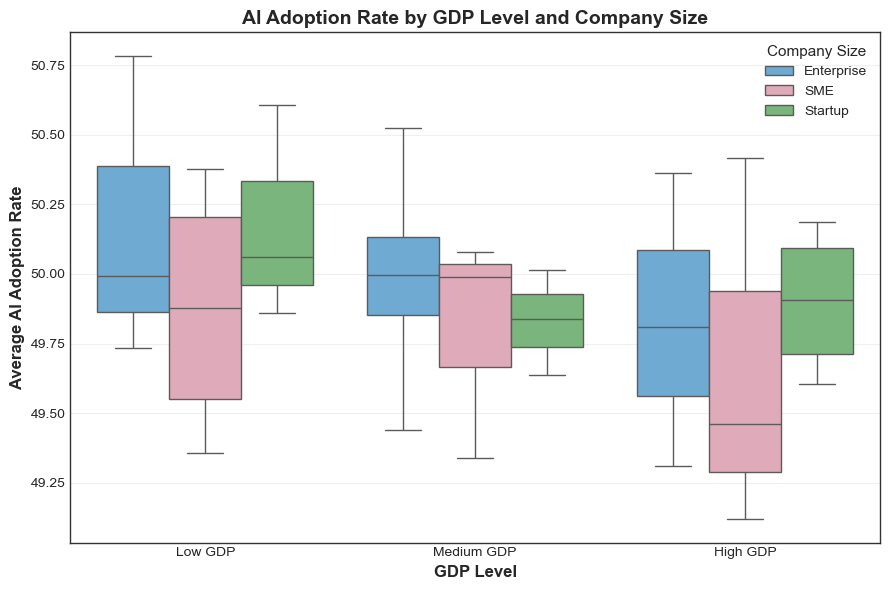

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aggregate by country and company size
country_size = (
    df1.groupby(["country", "company_size"])
       .agg(
           avg_adoption_rate=("adoption_rate", "mean"),
           mean_GDP=("GDP", "mean")
       )
       .reset_index()
)

# Create 3 GDP groups
country_size["GDP_group"] = pd.qcut(
    country_size["mean_GDP"],
    q=3,
    labels=["Low GDP", "Medium GDP", "High GDP"]
)

plt.figure(figsize=(9, 6))

# Swap axes: X = GDP group, Y = avg adoption rate
sns.boxplot(
    data=country_size,
    x="GDP_group",
    y="avg_adoption_rate",
    hue="company_size"
)

plt.xlabel("GDP Level")
plt.ylabel("Average AI Adoption Rate")
plt.title("AI Tool Adoption Rate by GDP Level and Company Size")

plt.legend(title="Company Size")
plt.tight_layout()

plt.savefig(
    r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_company_GDP",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [ ]:
8.	Are Daily Active User (DAU) levels higher in larger-GDP countries?

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

country_dau =( df1.groupby(["country",'industry']).agg(
    total_DAU =("daily_active_users","sum"),
    GDP =("GDP","mean")
).reset_index()
             )

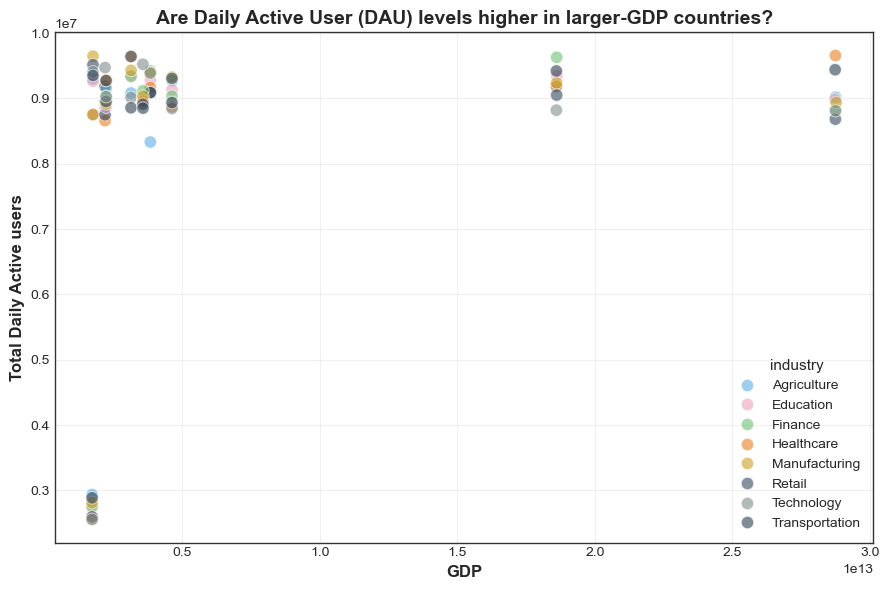

In [43]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=country_dau,
    x="GDP",
    y="total_DAU",
    hue = 'industry',
    alpha=0.6,
    s=80
)

plt.xlabel("GDP")
plt.ylabel("Total Daily Active users")
plt.title("Are Daily Active User (DAU) levels higher in larger-GDP countries?")
plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_user_POP", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Which industries show the fastest growth in AI adoption rates over time?

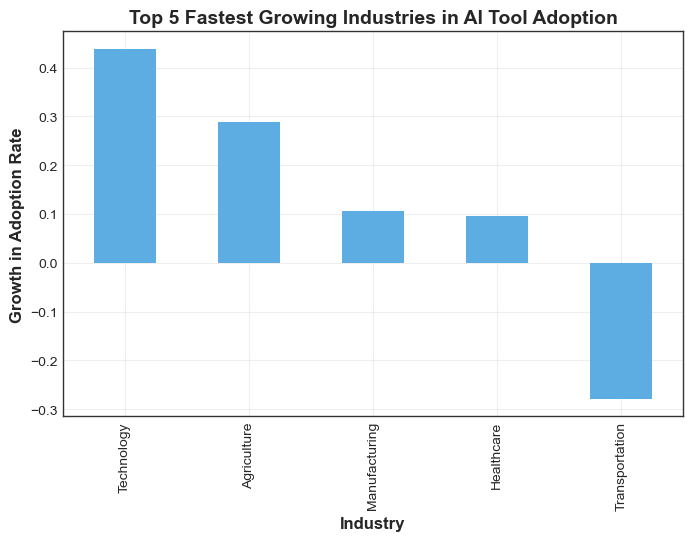

In [95]:
industry_data = (
    df.groupby(['industry','year'])['adoption_rate']
      .mean()
      .unstack()
      .sort_index(axis=1)
)

growth = industry_data.iloc[:,-1] - industry_data.iloc[:,0]
fastest_growth = growth.sort_values(ascending=False).head(5)

fastest_growth.plot(kind='bar', figsize=(8,5))
plt.title('Top 5 Fastest Growing Industries in AI Tool Adoption')
plt.xlabel('Industry')
plt.ylabel('Growth in Adoption Rate')
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_Industry", dpi=300, bbox_inches="tight")
plt.show()

High GDP countries:
['China' 'Germany' 'India' 'USA']

----------------------------------------

Low GDP countries:
['Australia' 'Brazil' 'Canada' 'South Korea']

High GDP countries with GDP values:
    country           GDP
76      USA  2.877822e+13
72      USA  2.875914e+13
78      USA  2.875729e+13
75      USA  2.875053e+13
77      USA  2.874914e+13
74      USA  2.874580e+13
79      USA  2.874036e+13
73      USA  2.873627e+13
25    China  1.861837e+13
26    China  1.861255e+13
29    China  1.861147e+13
28    China  1.860846e+13
27    China  1.860366e+13
31    China  1.860159e+13
30    China  1.859992e+13
24    China  1.859844e+13
40  Germany  4.622600e+12
41  Germany  4.621917e+12
46  Germany  4.618908e+12
43  Germany  4.618859e+12
42  Germany  4.618475e+12
45  Germany  4.618288e+12
47  Germany  4.616481e+12
44  Germany  4.615654e+12
55    India  3.833369e+12
49    India  3.833090e+12
53    India  3.831795e+12

Low GDP countries with GDP values:
        country           GDP
56  Sou

<Figure size 700x500 with 0 Axes>

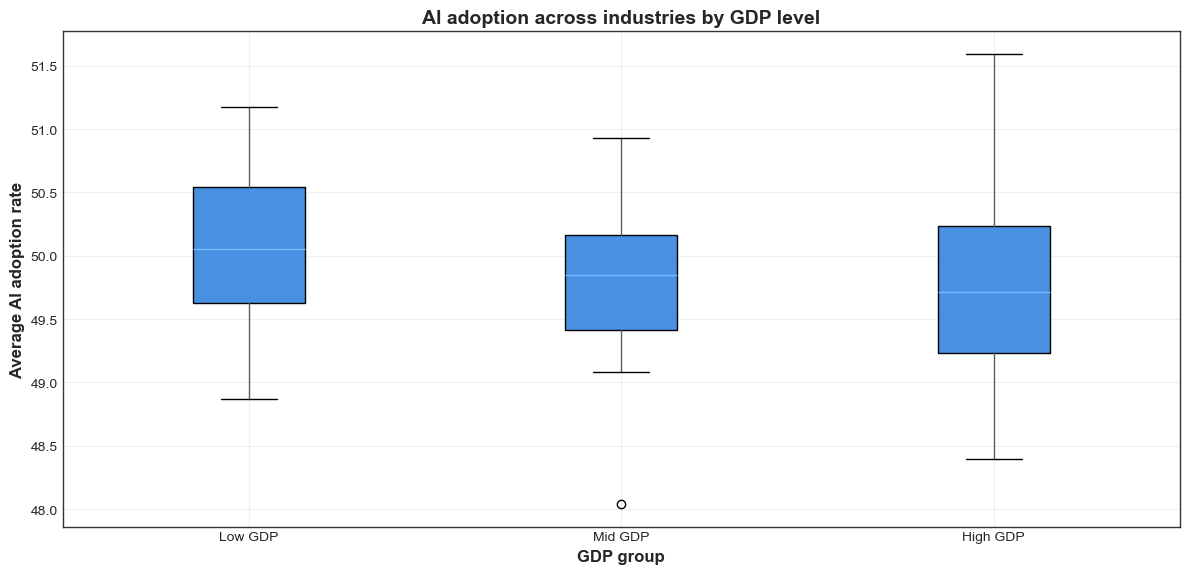

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Select required columns
# -----------------------------
df = df[["country", "industry", "GDP", "adoption_rate"]]

# -----------------------------
# Aggregate data
# -----------------------------
data = (
    df.groupby(["country", "industry"])
      .agg(
          GDP=("GDP", "mean"),
          avg_adoption_rate=("adoption_rate", "mean")
      )
      .reset_index()
)

# -----------------------------
# Create GDP groups (Low, Mid, High)
# -----------------------------
data["GDP_group"] = pd.qcut(
    data["GDP"],
    q=3,
    labels=["Low GDP", "Mid GDP", "High GDP"]
)

# -----------------------------
# Print High GDP and Low GDP countries
# -----------------------------
high_gdp_countries = (
    data[data["GDP_group"] == "High GDP"]["country"]
    .unique()
)

low_gdp_countries = (
    data[data["GDP_group"] == "Low GDP"]["country"]
    .unique()
)

print("High GDP countries:")
print(high_gdp_countries)

print("\n" + "-" * 40 + "\n")

print("Low GDP countries:")
print(low_gdp_countries)

# -----------------------------
# Optional: Print with GDP values
# -----------------------------
print("\nHigh GDP countries with GDP values:")
print(
    data[data["GDP_group"] == "High GDP"][["country", "GDP"]]
    .drop_duplicates()
    .sort_values(by="GDP", ascending=False)
)

print("\nLow GDP countries with GDP values:")
print(
    data[data["GDP_group"] == "Low GDP"][["country", "GDP"]]
    .drop_duplicates()
    .sort_values(by="GDP")
)

# -----------------------------
# Boxplot visualization
# -----------------------------
plt.figure(figsize=(7, 5))

data.boxplot(
    column="avg_adoption_rate",
    by="GDP_group",
    patch_artist=True,
    boxprops=dict(facecolor="#4a90e2"),
    medianprops=dict(color="#74b9ff")
)

plt.xlabel("GDP group")
plt.ylabel("Average AI adoption rate")
plt.title("AI adoption across industries by GDP level")
plt.suptitle("")
plt.tight_layout()

plt.savefig(
    r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\aiadoption_rate_industry_GDP.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
